<a href="https://colab.research.google.com/github/huiwon2/datavisualization/blob/main/20191007_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd           #판다스
import matplotlib as mpl       #맷플롭립
import matplotlib.pylab as plt   #맷플롭립
import seaborn as sns          #시본
import numpy as np           #넘파이

plt.rc('font', family='NanumBarunGothic')

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
CHART_NAME = 'mapTest'
cnt, PNG, UNDERBAR = 0, '.png', '_'

def FileSave():
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + ' 파일이 저장되었습니다.')
# end def FileSave():

In [ ]:
filename = '/content/gdrive/MyDrive/20191007/데이터시각화/지리실습/data/Subway.csv'
plt.style.use('ggplot') # 'ggplot' 형식의 스타일을 사용합니다.
# plt.style.use('Solarize_Light2')

In [ ]:
sub_df = pd.read_csv(filename, encoding='UTF-8')
sub_df.head(10)

,num,name,address,Latitude,Longitude,Phone
0,161,가산그레이트밸리,서울 금천구 디지털로9길 32,37.479449,126.887477,02-866-7119
1,160,서울시립대학교,서울특별시 동대문구 서울시립대로 163,37.583383,127.059303,02-6460-5866
2,159,방학역,서울특별시 도봉구 도봉로 684,37.665367,127.043478,02-956-1237
3,158,덕성여대,서울특별시 도봉구 삼양로 538,37.651018,127.013160,02-6369-1990
4,157,중곡역,서울시 광진구 중곡동 30-80,37.563969,127.085833,02-456-9665
5,156,충무로,서울 중구 퇴계로 197,37.561391,126.993913,02-2277-0883
6,155,신림,서울 관악구 신림로 318,37.482536,126.930245,02-888-8884
7,154,은평구청,서울시 은평구 은평로 200-1,37.600983,126.930021,02-388-1479
8,153,중계은행사거리,서울특별시 노원구 한글비석로 269,37.651679,127.076772,02-952-2266
9,152,테헤란로,서울특별시 강남구 테헤란로 314 지하1층,37.504570,127.049447,02-555-1014


In [ ]:
#info
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num        160 non-null    int64  
 1   name       160 non-null    object 
 2   address    160 non-null    object 
 3   Latitude   160 non-null    float64
 4   Longitude  160 non-null    float64
 5   Phone      160 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 7.6+ KB


In [ ]:
#isnull확인하기
#용산DTL점의 위도 경도가 null

In [ ]:
#address split하기(구별로 지도에 marking해야 해서)
'''sub_df['address'].apply(lambda x: str(x)).str.split()
print(sub_df['address'])
sub_df.info()'''

"sub_df['address'].apply(lambda x: str(x)).str.split()\nprint(sub_df['address'])\nsub_df.info()"

In [ ]:
sub_df['address'].apply(lambda x: str(x)).str.split().str[1].replace("'", "").replace(",", "")
#구라는 column 생성하기
#sub_df['Gu'] = sub_df['address'].apply(lambda x: str(x)).str.split().str[1].replace("'", "")
#str변경->split[1]->작은따옴표, 쉼표제거
sub_df['Gu'] = sub_df['address'].apply(lambda x: str(x).split()[1].replace("'", "").replace(",", ""))

In [ ]:
sub_df['Gu']

0       금천구
1      동대문구
2       도봉구
3       도봉구
4       광진구
       ... 
155    동대문구
156     마포구
157     종로구
158     성동구
159     종로구
Name: Gu, Length: 160, dtype: object

In [ ]:
sub_df.head(10)

,num,name,address,Latitude,Longitude,Phone,Gu
0,161,가산그레이트밸리,서울 금천구 디지털로9길 32,37.479449,126.887477,02-866-7119,금천구
1,160,서울시립대학교,서울특별시 동대문구 서울시립대로 163,37.583383,127.059303,02-6460-5866,동대문구
2,159,방학역,서울특별시 도봉구 도봉로 684,37.665367,127.043478,02-956-1237,도봉구
3,158,덕성여대,서울특별시 도봉구 삼양로 538,37.651018,127.013160,02-6369-1990,도봉구
4,157,중곡역,서울시 광진구 중곡동 30-80,37.563969,127.085833,02-456-9665,광진구
5,156,충무로,서울 중구 퇴계로 197,37.561391,126.993913,02-2277-0883,중구
6,155,신림,서울 관악구 신림로 318,37.482536,126.930245,02-888-8884,관악구
7,154,은평구청,서울시 은평구 은평로 200-1,37.600983,126.930021,02-388-1479,은평구
8,153,중계은행사거리,서울특별시 노원구 한글비석로 269,37.651679,127.076772,02-952-2266,노원구
9,152,테헤란로,서울특별시 강남구 테헤란로 314 지하1층,37.504570,127.049447,02-555-1014,강남구


In [ ]:
#기본 좌표 설정하기(서울특별시로)
# 위도
latitude = 37.541

# 경도
longitude = 126.986

In [ ]:
# 코드입력
m = folium.Map(location=[latitude, longitude],
               zoom_start=17,
               width=750,
               height=500
              )
m

In [ ]:
#target으로 이름, 주소, 위도, 경도, 구 저장
sub_target_df = sub_df[["name", "address", "Latitude", "Longitude", "Gu"]]

In [ ]:
#마커로 찍어보기(테스트)
for index, location_info in sub_target_df.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["name"]).add_to(m)

In [ ]:
m

In [ ]:
from folium.plugins import MarkerCluster

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=15
)

coords = sub_target_df[['Latitude', 'Longitude']]

In [ ]:
# 코드입력
marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['Latitude'], coords['Longitude']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
m

In [ ]:
#클러스터 마킹 후 구별 매장 수를 그래프로도 시각화
sub_target_df.groupby('Gu').sum()

<ipython-input-23-3ffdaec4ad23>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub_target_df.groupby('Gu').sum()


,Latitude,Longitude
Gu,,
강남구,562.555721,1905.698622
강동구,225.258934,762.850704
강북구,150.495816,508.102621
강서구,150.230113,507.360154
관악구,149.924520,507.773556
광진구,337.904078,1143.736714
구로구,112.485471,380.650069
금천구,112.428947,380.665658
노원구,150.556535,508.277621


In [ ]:
sub_target_df['Gu'].count().sum()

160

In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#cartodbpositron
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)
m

In [ ]:
import requests
import json
# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)
seoul_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

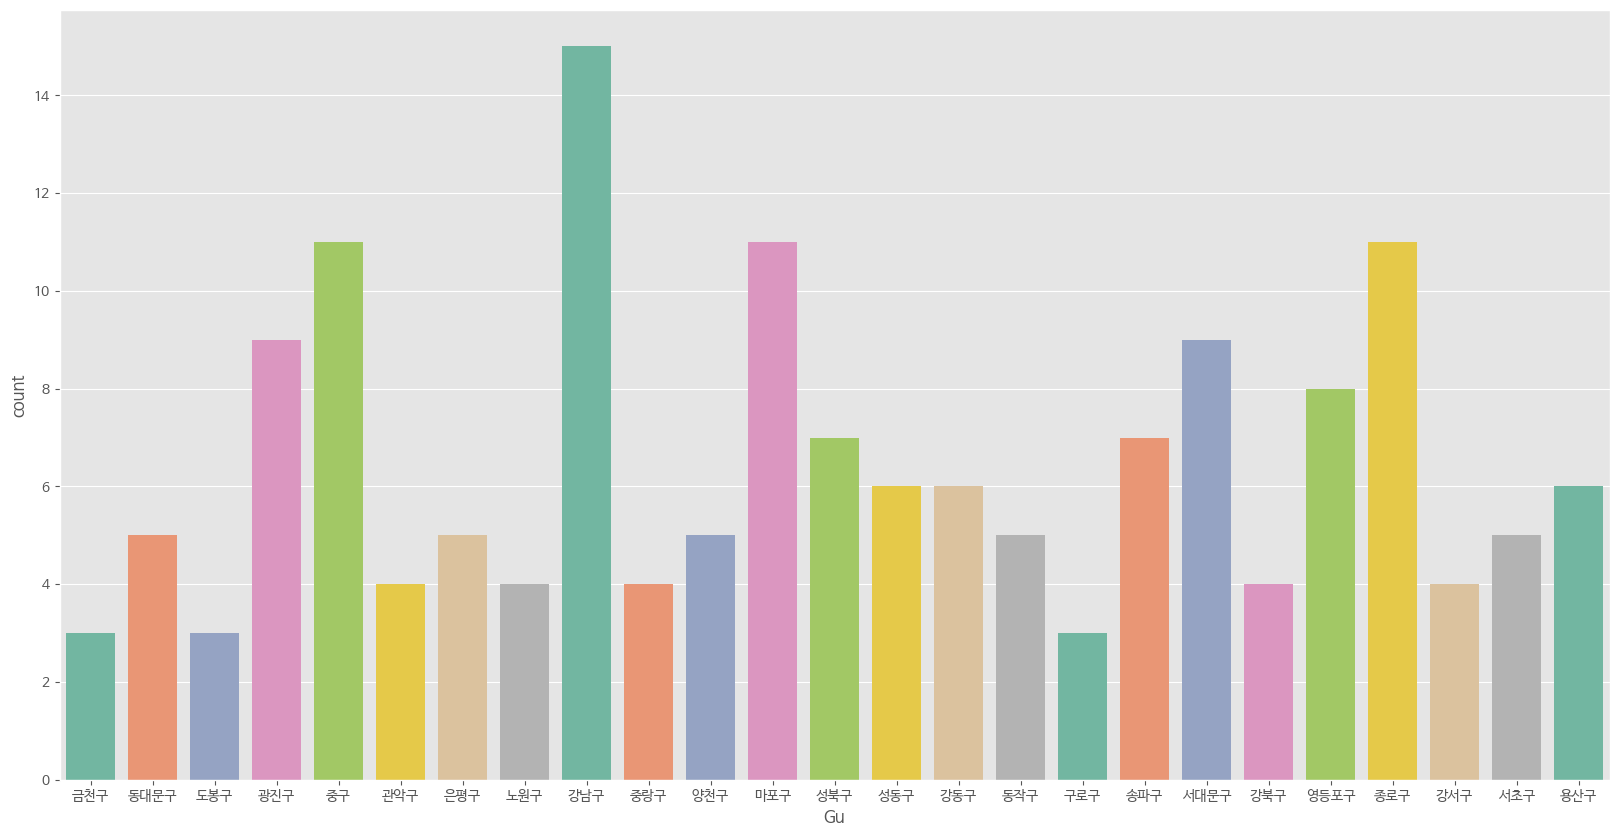

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Gu", data=sub_target_df, palette="Set2")

In [ ]:
#실패
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=10,
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='Gu'
).add_to(m)

m.choropleth(geo_data = "seoul_geo",
             data=sub_target_df.groupby('Gu')['Gu'].sum(),
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.9,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name=f'구별 매장수',
            )
m

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


TypeError: ignored